Phát hiện tấn công DDoS bằng mô hình Random Forest 

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Đọc dữ liệu huấn luyện và kiểm tra
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")


Tiền xử lý dữ liệu
Mã hóa các cột dạng chữ thành số để mô hình có thể xử lý được. Đồng thời tách đặc trưng và nhãn.

In [3]:
# Tách đặc trưng và nhãn
x_train = train_df.drop(columns=["class"])
y_train = train_df["class"]
x_test = test_df.drop(columns=["class"])
y_test = test_df["class"]

# Mã hóa các cột dạng object
for col in x_train.columns:
    if x_train[col].dtype == "object":
        le = LabelEncoder()
        x_train[col] = le.fit_transform(x_train[col])
        x_test[col] = le.transform(x_test[col])
        
# Mã hóa nhãn
label_encoder_y = LabelEncoder()
y_train = label_encoder_y.fit_transform(y_train)
y_test = label_encoder_y.transform(y_test)


Huấn luyện mô hình
Áp dụng `RandomForestClassifier` để học từ dữ liệu huấn luyện.

In [4]:
# Huấn luyện mô hình Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

Dự đoán và đánh giá
Sử dụng mô hình để dự đoán dữ liệu kiểm tra và đánh giá bằng độ chính xác, precision, recall, F1-score.

In [5]:
# Dự đoán và đánh giá
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder_y.classes_)
print(f"Độ chính xác: {accuracy:.2%}")
print("Báo cáo phân loại:\n", report)


Độ chính xác: 77.61%
Báo cáo phân loại:
               precision    recall  f1-score   support

     anomaly       0.97      0.63      0.76     12833
      normal       0.66      0.97      0.79      9711

    accuracy                           0.78     22544
   macro avg       0.82      0.80      0.78     22544
weighted avg       0.84      0.78      0.77     22544



Trực quan hóa
Hiển thị ma trận nhầm lẫn (confusion matrix) để thấy được kết quả dự đoán so với thực tế.

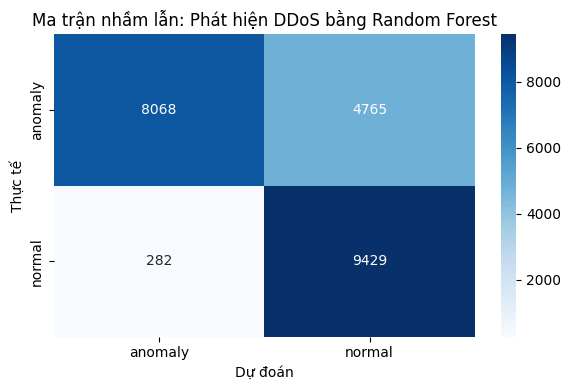

In [6]:
# Biểu đồ confusion matrix
conf_matrix = pd.crosstab(label_encoder_y.inverse_transform(y_test),
                          label_encoder_y.inverse_transform(y_pred),
                          rownames=["Thực tế"], colnames=["Dự đoán"])

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Ma trận nhầm lẫn: Phát hiện DDoS bằng Random Forest")
plt.tight_layout()
plt.show()
